# **Pràctica 3. Grafs, Topologia i Geometria Discreta** 
Enginyeria de Dades , Curs 2022-2023.

In [1]:
# Importar llibreries necessàries
import numpy as np
import sympy as sp
from sympy import *
from sympy.solvers import solve
import cmath 
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from sympy.plotting import plot_parametric
from sympy.plotting import plot3d_parametric_line
import math
%matplotlib inline
plt.rcParams['figure.dpi'] = 110 

In [2]:
# Versió de Python i altres biblioteques
!python --version
print('NumPy', np.__version__)
print('Sympy', sp.__version__)
print('Matplotlib', mpl.__version__)

Python 3.7.10
NumPy 1.19.5
Sympy 1.7.1
Matplotlib 3.3.4


## **PRELIMINARS**

L'objectiu d'aquesta pràctica és el mateix que el de la pràctica 2: calcular les circunferències osculatòries i centres de la corba:
$$(e^{-t}cos(\pi t), e^{-t}sin(\pi t)).$$
Tanmateix, en aquest cas no utilitzarem l'expressió analítica per a fer-ho, sinó que trobarem les derivades de la corba a partir del mètode de diferencies finites.

Recordeu que aquest mètode s'utilitza a la pràctica quan es necessita calcular la derivada d'una corba però només es disposa d'una discreitització d'aquesta corba, i no de la seva expressió analítica.

De la mateixa manera que en la pràctica 2, necessitem certs preliminaris. En primer lloc definim una funció que ens doni els valors de la corba anterior en un punt determinat:

In [3]:
# definim la variable t
t = symbols('t')
# definim la funció
def CorbaPunt(t): 
    return (np.array([math.exp(-t)*math.cos(math.pi*t), math.exp(-t)*math.sin(math.pi*t)]))

Funció que retorna una seqüència de punts de la corba amb certa precisió

In [4]:
def Corba(Inici,Final,Precisio): 
    t=np.arange(Inici, Final+Precisio, Precisio)
    x = []
    y = []
    for i in t:
        x.append(CorbaPunt(i)[0])
        y.append(CorbaPunt(i)[1])
    return (x,y)

Els següents són els valors de la corba $(e^{-t}cos(\pi t), e^{-t}sin(\pi t))$ a l'interval $[0,5]$ 

In [5]:
xc, yc = Corba(0,5,0.1) # NO MODIFIQUI AQUESTA LÍNIA PER A QUE LA TEVA SOLUCIÓ SIGUI CORRECTA

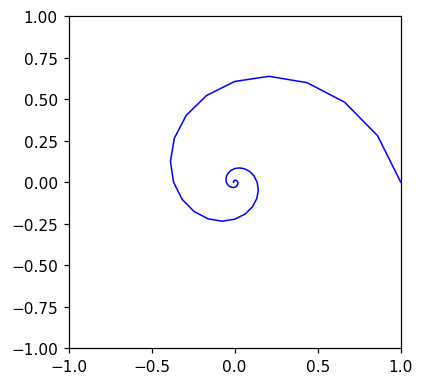

In [6]:
# Creem una nova figure i un nou axis
fig, ax = plt.subplots()

plt.plot(xc,yc,'blue', linewidth=1)
plt.ylim([-1, 1]) 
plt.xlim([-1, 1])

# Això és per veure la corba en un rectange, i.e. per a que el rati entre l'eix de les x i el eix de les y sigui 1
ax.set_aspect('equal')

# Ajustar la mida del plot
fig.set_size_inches(4, 4)  

# **Diferencies finites**
Les diferències finites s'utilitzen sovint com a aproximació de la derivada, normalment en la diferenciació numèrica.

La derivada d'una funció $f$ en un punt $x$ es defineix pel límit.
$$ f'(x) = \lim_{h → 0} \frac{f(x+h) - f(x)}{h}.$$

In [7]:
def derivadaprimera(valx, valy):
    der1 = []
    for i in range(1, len(valx)-1):
        dxdt = valx[i] - valx[i-1] # this is the same as f(x+h) - f(x) in the first coordinate
        dydt = valy[i] - valy[i-1] 
        der1.append([dxdt,dydt])
    return np.array(der1)

Per exemple la derivada de la funció
$$(e^{-t}cos(\pi t), e^{-t}sin(\pi t))$$
es calcula de la forma següent:

In [32]:
derpricurva = derivadaprimera(xc,yc)

In [33]:
derpricurva[0]

array([-0.13944848,  0.27961014])

La segona derivada de la funció $f$ al punt $x$ es defineix com el límit. 
$$ f''(x) = \lim_{h → 0} \frac{f(x+h) - 2*f(x) + f(x-h)}{h^2}.$$

La funció següent aproxima la segona derivada d'una funció utilitzant el mètode de les diferències finites.

In [58]:
def derivadasegunda(valx, valy):
    der2 = []
    for i in range(1, len(valx)-1):
        dxdt = valx[i+1]- 2*valx[i] + valx[i-1]  # this is the same as f(x+h) - f(x) in the first coordinate
        dydt = valy[i+1]- 2*valy[i] + valy[i-1]
        der2.append([dxdt,dydt])
    return np.array(der2)

In [59]:
dersegcurva = derivadasegunda(xc,yc)
dersegcurva[0]

array([-0.05873595, -0.07798242])

# **Vector tangent**

El vector tangent d'una corba $\gamma$ en un punt $\gamma(t)$ ve donat per:
$$T(t) = \frac{\gamma'(t)}{\|\gamma'(t)\|}$$
Escriviu el codi per a que la següent funció calculi els valors del vector gradient:

In [42]:
def Modul(v):
    return(sqrt(v[0]**2+v[1]**2)) 

def TangentVector(valx, valy):
    vector_tangent = []
    derpricurva = derivadaprimera(valx,valy)
    for i in range(len(derpricurva)):
       
        TN = np.array([derpricurva[i][0],derpricurva[i][1]])
    
        vector_tangent.append(TN/Modul(TN))
        
    return np.array(vector_tangent)
        

    # Ha de tornar un array amb el valor del vector tangent en els punts de la corba

In [43]:
T = TangentVector(xc, yc)
print(T)

[[-0.446300352859725 0.894883229833527]
 [-0.700990984811769 0.713170133427240]
 [-0.887063735079055 0.461646975412593]
 [-0.986304506420338 0.164934594960950]
 [-0.988998920685620 -0.147922732812365]
 [-0.894883229833527 -0.446300352859724]
 [-0.713170133427239 -0.700990984811769]
 [-0.461646975412593 -0.887063735079056]
 [-0.164934594960951 -0.986304506420338]
 [0.147922732812365 -0.988998920685620]
 [0.446300352859724 -0.894883229833528]
 [0.700990984811770 -0.713170133427239]
 [0.887063735079055 -0.461646975412593]
 [0.986304506420339 -0.164934594960950]
 [0.988998920685620 0.147922732812365]
 [0.894883229833527 0.446300352859724]
 [0.713170133427240 0.700990984811769]
 [0.461646975412593 0.887063735079056]
 [0.164934594960950 0.986304506420338]
 [-0.147922732812364 0.988998920685620]
 [-0.446300352859724 0.894883229833527]
 [-0.700990984811768 0.713170133427240]
 [-0.887063735079056 0.461646975412592]
 [-0.986304506420338 0.164934594960950]
 [-0.988998920685620 -0.147922732812365]

Sortida esperada:
```
[[-0.446300352859725, 0.894883229833527], [-0.700990984811769, 0.713170133427240],...
```

El vector normal d'una corba $\gamma$ en un punt $\gamma(t)$ ve donat per la fórmula:
$$N(t) = \frac{(-y'(t), x'(t))}{\sqrt{x'(t)^2 + y'^2(t)}}$$
Escriviu el codi per a que la següent funció calculi els valors del vector normal:

In [51]:
def NormalVector(valx,valy):
    vector_normal = []
    derpricurva = derivadaprimera(valx,valy)
    for i in range(len(derpricurva)):
       
        TN = np.array([-derpricurva[i][1],derpricurva[i][0]])
        
        vector_normal.append(TN/Modul(TN))
        
    return np.array(vector_normal)
        
    # Ha de tornar un array amb el valor del vector normal en els punts de la corba

In [52]:
nvectorcurva = NormalVector(xc,yc)
print(nvectorcurva)

[[-0.894883229833527 -0.446300352859725]
 [-0.713170133427240 -0.700990984811769]
 [-0.461646975412593 -0.887063735079055]
 [-0.164934594960950 -0.986304506420338]
 [0.147922732812365 -0.988998920685620]
 [0.446300352859724 -0.894883229833527]
 [0.700990984811769 -0.713170133427239]
 [0.887063735079056 -0.461646975412593]
 [0.986304506420338 -0.164934594960951]
 [0.988998920685620 0.147922732812365]
 [0.894883229833528 0.446300352859724]
 [0.713170133427239 0.700990984811770]
 [0.461646975412593 0.887063735079055]
 [0.164934594960950 0.986304506420339]
 [-0.147922732812365 0.988998920685620]
 [-0.446300352859724 0.894883229833527]
 [-0.700990984811769 0.713170133427240]
 [-0.887063735079056 0.461646975412593]
 [-0.986304506420338 0.164934594960950]
 [-0.988998920685620 -0.147922732812364]
 [-0.894883229833527 -0.446300352859724]
 [-0.713170133427240 -0.700990984811768]
 [-0.461646975412592 -0.887063735079056]
 [-0.164934594960950 -0.986304506420338]
 [0.147922732812365 -0.9889989206856

Sortida esperada:
```
[[-0.894883229833527, -0.446300352859725], [-0.713170133427240, -0.700990984811769],...
```

Recordeu que es defined la curvatura de $\gamma$ al punt $\gamma(t)$ com
$$\kappa(t) = \frac{x'(t)y''(t)- x''(t)y'(t)}{\|\gamma'(t) \|^{3}}$$
Escriviu el codi per a que la següent funció calculi els valors de la curvatura:

In [71]:
def Kur(valx,valy):   
    curvatura = []
    derpricurva = derivadaprimera(valx,valy)
    dersegcurva = derivadasegunda(valx,valy)
    for i in range(len(derpricurva)):
       
        kur = derpricurva[i][0]*dersegcurva[i][1]-dersegcurva[i][0]*derpricurva[i][1]
        kurden = np.array([derpricurva[i][0],derpricurva[i][1]])
        
        curvatura.append(kur/(Modul(kurden)**3))
        
    return np.array(curvatura)

    # Ha de tornar un array amb el valor de la curvatura en els punts de la corba

In [72]:
# calcule la curvatura de la curva espiral 
curvt = Kur(xc,yc) 
print(curvt)

[0.894883229833526 0.988998920685621 1.09301284514995 1.20796600954285
 1.33500890377065 1.47541301581936 1.63058355723385 1.80207352694719
 1.99159925421605 2.20105757622073 2.43254482224922 2.68837779446532
 2.97111695524345 3.28359205313650 3.62893044395079 4.01058839037375
 4.43238565341286 4.89854372184769 5.41372806230804 5.98309481283293
 6.61234238723219 7.30776850672791 8.07633322966479 8.92572861011343
 9.86445568253328 10.9019095429818 12.0484733783948 13.3156223850107
 14.7160386159907 16.2637379076714 17.9742101547627 19.8645743384238
 21.9537498587778 24.2626458866283 26.8143706294698 29.6344626061916
 32.7511462451632 36.1956143637969 40.0023403567491 44.2094232172439
 48.8589688445950 53.9975114542115 59.6764793076516 65.9527094239579
 72.8890164236542 80.5548211985584 89.0268456994332 98.3898807950190
 108.737634887586]


Sortida esperada:
```
[0.894883229833526, 0.988998920685621, 1.09301284514995, 1.20796600954285,...
```

# **Circunferències osculatòries**

La funció següent dóna els punts d'una circumferència amb ràdio r i centre t.


In [75]:
def Cercle(t,r):  
    return (np.array([r*math.cos(t),r*math.sin(t)]))

Funció per dibuixar una circunferència amb centre punt i radi r, amb una precisió Precisio.

In [74]:
# no modifique esta función
def GraficarCircunferencia(a,b,Precisio,punt,r):
    punts=np.arange(a, b+Precisio, Precisio)
    lp=len(punts)-1
    p1=np.empty(lp, dtype=object)
    p2=np.empty(lp, dtype=object)
    for i in range(lp):
        p1[i]=Cercle(punts[i],r)[0]+punt[0]
        p2[i]=Cercle(punts[i],r)[1]+punt[1]
    plt.plot(p1,p2,color="red")

Dibuixem les centres de las circunferències osculatòries

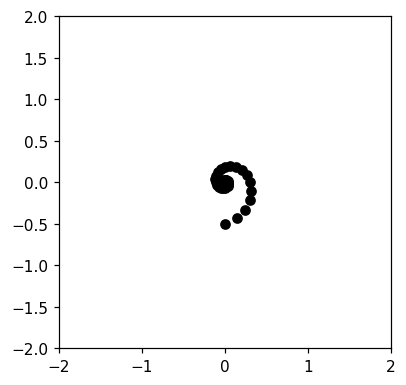

In [76]:
# Create a new figure and axis
fig, ax = plt.subplots()
# no modifique esta función
for i in range(len(xc)-2):
    w =nvectorcurva[i]
    desplazx=(1/curvt[i])*w[0]
    desplazy=(1/curvt[i])*w[1]
    c0=xc[i]+desplazx
    c1=yc[i]+desplazy 
    plt.plot(c0,c1, marker = 'o',color="black")
    plt.ylim([-2, 2]) # ajuste estos valores para visualizar la curva en caso de cambiarla
    plt.xlim([-2, 2]) # ajuste estos valores para visualizar la curva en caso de cambiarla
    
# Set the aspect ratio to be equal
ax.set_aspect('equal')

Sortida esperada:

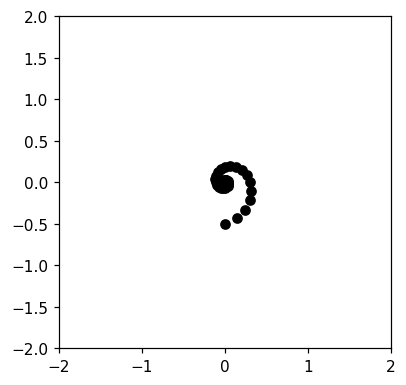

Dibuixem les circunferències osculatòries

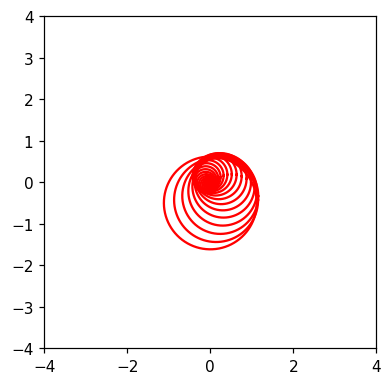

In [77]:
# Create a new figure and axis
fig, ax = plt.subplots()

for i in range(len(xc)-2):
    w =nvectorcurva[i]
    desplazx=(1/curvt[i])*w[0]
    desplazy=(1/curvt[i])*w[1]
    c0=xc[i]+desplazx
    c1=yc[i]+desplazy  
    GraficarCircunferencia(0,2*pi,0.01,[c0,c1],1/curvt[i])
    plt.ylim([-4, 4]) # ajuste estos valores para visualizar la curva en caso de cambiarla
    plt.xlim([-4, 4]) # ajuste estos valores para visualizar la curva en caso de cambiarla
    
# Set the aspect ratio to be equal
ax.set_aspect('equal')

Sortida esperada:

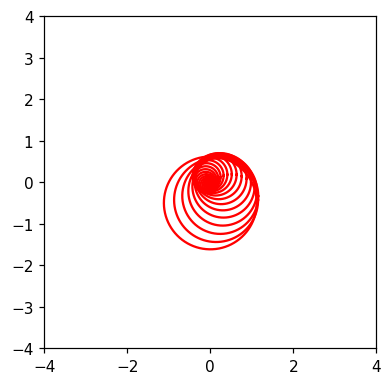

# **Recursos addicionals**
---
Els següents enllaços corresponen a llocs on trobareu informació molt útil per aprofundir en el coneixement de les funcionalitats de la llibreries usades: \
[Python](https://www.python.org/) \
[SymPy](https://docs.sympy.org/latest/index.html) \
[NumPy](https://numpy.org/)

**Felicitacions!** Ha acabat la Pràctica. Bona feina!

## **Entrega**

Per lliurar el notebook si us plau feu el següent:
1. Descarregueu el notebook (`Archivo` -> `Descargar .ipynb`).
2. Introduïu al *Campus Virtual*.
3. Feu l'enviament del *notebook* que heu descarregat.